### DATA BPS, TUGAS UJIAN JCDS03

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as limo

In [41]:
bps = pd.read_excel("bps.xls", na_values = ["-"], header=3, skipfooter=2)
bps.rename(columns={'Unnamed: 0':'Provinsi'}, inplace=True)
bpsProv = bps[:33]
bpsProv

,Provinsi,1971,1980,1990,1995,2000,2010
0,Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
1,Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
2,Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
3,Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
4,Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265
5,Sumatera Selatan,3440573.0,4629801.0,6313074.0,7207545.0,6899675.0,7450394
6,Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
7,Lampung,2777008.0,4624785.0,6017573.0,6657759.0,6741439.0,7608405
8,Kepulauan Bangka Belitung,NaN,NaN,NaN,NaN,900197.0,1223296
9,Kepulauan Riau,NaN,NaN,NaN,NaN,NaN,1679163


In [64]:
bpNegara = bps[33:34]
bpNegara

,Provinsi,1971,1980,1990,1995,2000,2010
33,INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [52]:
bpMax = (bpsProv[(bpsProv[2010]) == (bpsProv[2010]).max()])
bpMax

,Provinsi,1971,1980,1990,1995,2000,2010
11,Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732


In [53]:
bpMin = (bpsProv[(bpsProv[1971]) == (bpsProv[1971]).min()])
bpMin

,Provinsi,1971,1980,1990,1995,2000,2010
6,Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518


In [62]:
dataMax = list()
for i in bpMax.columns:
    val = list(bpMax[i])
    for j in val:
        dataMax.append(j)
dataMax[1:]

[21623529.0, 27453525.0, 35384352.0, 39206787.0, 35729537.0, 43053732]

In [63]:
dataMin = list()
for i in bpMin.columns:
    val = list(bpMin[i])
    for j in val:
        dataMin.append(j)
dataMin[1:]

[519316.0, 768064.0, 1179122.0, 1409117.0, 1567432.0, 1715518]

In [80]:
dataNgr = list()
for i in bpNegara.columns:
    val = list(bpNegara[i])
    for j in val:
        dataNgr.append(j)
dataNgr[1:]

[119208229.0, 147490298.0, 179378946.0, 194754808.0, 206264595.0, 237641326]

In [86]:
tahun = bpsProv.columns.tolist()[1:]
tahun

[1971, 1980, 1990, 1995, 2000, 2010]

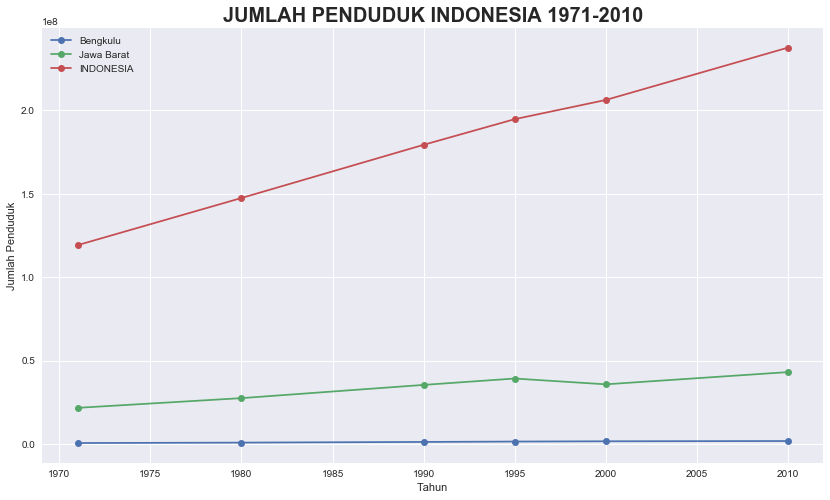

In [87]:
plt.style.use("seaborn")
plt.figure(figsize= (14,8))
plt.plot(tahun, dataMin[1:], "-o")
plt.plot(tahun, dataMax[1:], "-o")
plt.plot(tahun, dataNgr[1:], "-o")
plt.legend([dataMin[0], dataMax[0], dataNgr[0]])
plt.title(f"JUMLAH PENDUDUK {dataNgr[0]} 1971-2010", size=20, fontweight='bold')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penduduk")
plt.show()

____

In [94]:
data = {
    "tahun": tahun,
    "Min1971": dataMin[1:],
    "Max2010": dataMax[1:],
    "All": dataNgr[1:]
}
df = pd.DataFrame(data)
df

,tahun,Min1971,Max2010,All
0,1971,519316.0,21623529.0,119208229.0
1,1980,768064.0,27453525.0,147490298.0
2,1990,1179122.0,35384352.0,179378946.0
3,1995,1409117.0,39206787.0,194754808.0
4,2000,1567432.0,35729537.0,206264595.0
5,2010,1715518.0,43053732.0,237641326.0


In [95]:
modelNgr = limo.LinearRegression()
modelNgr.fit(df[["tahun"]], df["All"])
df["RegAll"] = modelNgr.predict(df[["tahun"]])

modelMin = limo.LinearRegression()
modelMin.fit(df[["tahun"]], df["Min1971"])
df["RegMin"] = modelMin.predict(df[["tahun"]])

modelMax = limo.LinearRegression()
modelMax.fit(df[["tahun"]], df["Max2010"])
df["RegMax"] = modelMax.predict(df[["tahun"]])

df

,tahun,Min1971,Max2010,All,RegAll,RegMin,RegMax
0,1971,519316.0,21623529.0,119208229.0,1.202867e+08,5.334203e+05,2.299558e+07
1,1980,768064.0,27453525.0,147490298.0,1.475130e+08,8.302738e+05,2.783143e+07
2,1990,1179122.0,35384352.0,179378946.0,1.777645e+08,1.160111e+06,3.320459e+07
3,1995,1409117.0,39206787.0,194754808.0,1.928903e+08,1.325030e+06,3.589118e+07
4,2000,1567432.0,35729537.0,206264595.0,2.080161e+08,1.489948e+06,3.857776e+07
5,2010,1715518.0,43053732.0,237641326.0,2.382676e+08,1.819786e+06,4.395092e+07


In [111]:
print(f"Prediksi jumlah penduduk {dataMax[0]} di tahun 2050: {round(modelMax.predict([[2050]])[0])}")
print(f"Prediksi jumlah penduduk {dataMin[0]} di tahun 2050: {round(modelMin.predict([[2050]])[0])}")
print(f"Prediksi jumlah penduduk {dataNgr[0]} di tahun 2050: {round(modelNgr.predict([[2050]])[0])}")

Prediksi jumlah penduduk Jawa Barat di tahun 2050: 65443585.0
Prediksi jumlah penduduk Bengkulu di tahun 2050: 3139135.0
Prediksi jumlah penduduk INDONESIA di tahun 2050: 359273669.0


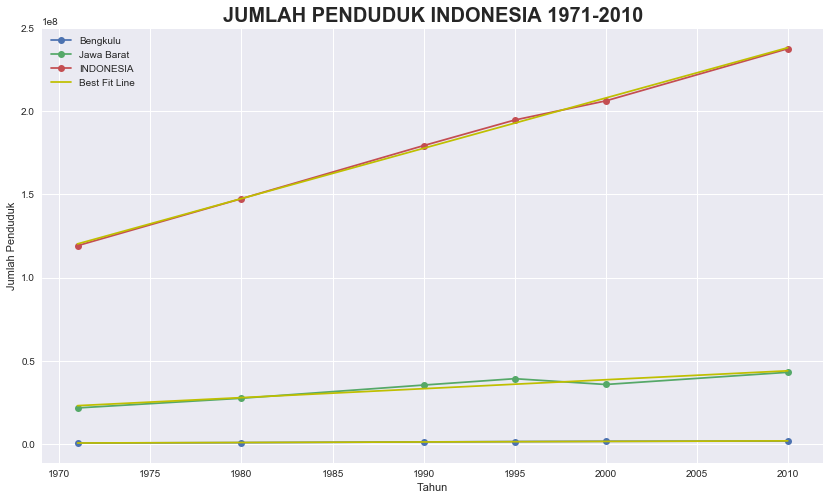

In [112]:
plt.style.use("seaborn")
plt.figure(figsize= (14,8))
plt.plot(tahun, dataMin[1:], "-o")
plt.plot(tahun, dataMax[1:], "-o")
plt.plot(tahun, dataNgr[1:], "-o")
plt.plot(tahun, df["RegAll"], "y-")
plt.plot(tahun, df["RegMin"], "y-")
plt.plot(tahun, df["RegMax"], "y-")
plt.legend([dataMin[0], dataMax[0], dataNgr[0], "Best Fit Line"])
plt.title(f"JUMLAH PENDUDUK {dataNgr[0]} 1971-2010", size=20, fontweight='bold')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penduduk")
plt.show()